In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2
from scipy import signal

In [12]:
img=cv2.imread('Barbara.bmp',0)

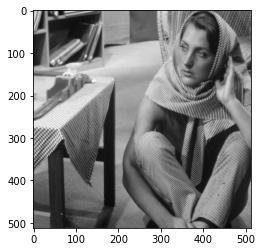

In [14]:
plt.imshow(img,cmap='gray')

In [23]:
filter_size=3
h= (1/(filter_size)**2) * (np.ones([filter_size,filter_size]))
img=signal.fftconvolve(img,h,mode='same')

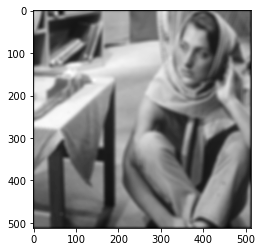

In [24]:
plt.imshow(img,cmap='gray')

In [25]:
#Computing gradients

sobel_x = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sobel_y = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

G_x = signal.correlate2d(img,sobel_x,mode='same')
G_y = signal.correlate2d(img,sobel_y,mode='same')

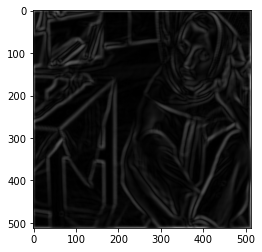

In [26]:
M = np.abs(G_x) + np.abs(G_y)
plt.imshow(M,cmap='gray')

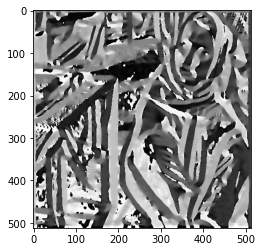

In [29]:
dir_M = np.arctan2(G_y, G_x) * 180 / np.pi
plt.imshow((dir_M),cmap='gray')

In [34]:
horiz_mask = np.logical_or(np.logical_and(dir_M<=22.5,dir_M>=-22.5),np.logical_and(dir_M>=157.5,dir_M<=-157.5))
print(horiz_mask)
vert_mask = np.logical_or(np.logical_and(dir_M<=-67.5,dir_M>=-112.5),np.logical_and(dir_M<=112.5,dir_M>=67.5))
print(vert_mask)
plus45_mask = np.logical_or(np.logical_and(dir_M<157.5,dir_M>112.5),np.logical_and(dir_M<-22.5,dir_M>-67.5))
print(plus45_mask)
minus45_mask = np.logical_or(np.logical_and(dir_M<67.5,dir_M>22.5),np.logical_and(dir_M<-112.5,dir_M>-157.5))
print(minus45_mask)
g_n= np.zeros(M.shape)
for i in range(1,M.shape[0]-1):
    for j in range(1,M.shape[1]-1):
        if horiz_mask[i,j]:
            if (horiz_mask[i,j+1] and M[i,j] < M[i,j+1]) or (horiz_mask[i,j-1] and M[i,j] < M[i,j-1]):
                g_n[i,j] = 0
            else:
                g_n[i,j] = M[i,j]
        elif vert_mask[i,j]:
            if (vert_mask[i-1,j] and M[i,j] < M[i-1,j]) or (vert_mask[i+1,j] and M[i,j] < M[i+1,j]):
                g_n[i,j] = 0
            else:
                g_n[i,j] = M[i,j]
        
        elif plus45_mask[i,j]:
            if (plus45_mask[i-1,j-1] and M[i,j] < M[i-1,j-1]) or (plus45_mask[i+1,j+1] and M[i,j] < M[i+1,j+1]):
                g_n[i,j] = 0
            else:
                g_n[i,j] = M[i,j]
        elif minus45_mask[i,j]:
            if (minus45_mask[i-1,j+1] and M[i,j] < M[i-1,j+1]) or (minus45_mask[i+1,j-1] and M[i,j] < M[i+1,j-1]):
                g_n[i,j] = 0
            else:
                g_n[i,j] = M[i,j]

[[False  True  True ...  True  True False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False ... False False False]
 [ True False False ... False False  True]
 [ True False False ... False False  True]
 ...
 [ True False False ... False False  True]
 [ True False False ... False False  True]
 [False False False ... False False False]]
[[False False False ... False False  True]
 [False False False ...  True  True False]
 [False False False ...  True  True False]
 ...
 [False  True  True ... False False False]
 [False  True  True ... False False False]
 [ True False False ... False False False]]
[[ True False False ... False False False]
 [False  True  True ... False False False]
 [False  True  True ... False False False]
 ...
 [False False False ...  True  True False]
 [False False False ...  True  

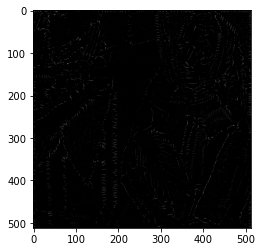

In [33]:
plt.imshow(g_n,cmap='gray')

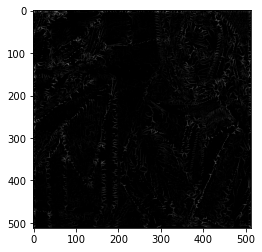

In [35]:
plt.imshow(g_n,cmap='gray')

In [36]:
edges = cv2.Canny(img,100,200)
plt.imshow(edges,cmap='gray')

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-h4wtvo23\opencv\modules\imgproc\src\canny.cpp:829: error: (-215:Assertion failed) _src.depth() == CV_8U in function 'cv::Canny'


Text(0.5, 1.0, 'Edge Image')

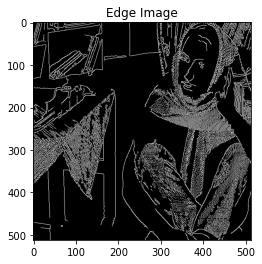

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Barbara.bmp',0)
edges = cv2.Canny(img,100,200)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')